# Sistema Inteligente de Predicción de Riego

## Proyecto Completo de Machine Learning para Predicción de Éxito/Fracaso de Cultivos

Este notebook implementa un pipeline completo de Machine Learning incluyendo:
- Comprensión del negocio y datos
- Exploración visual de datos (EDA)
- Preparación y ingeniería de características
- Entrenamiento y comparación de múltiples modelos
- Evaluación y persistencia de modelos

**Objetivo:** Predecir el resultado (éxito/fracaso) de cultivos basándose en variables ambientales y características del cultivo.

## 1. IMPORTACIÓN DE LIBRERÍAS NECESARIAS

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             roc_curve, precision_recall_curve, average_precision_score)

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                               AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# SMOTE para balanceo de clases
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Para guardar modelos
import joblib
import pickle
from datetime import datetime

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Todas las librerías importadas exitosamente")

✅ Todas las librerías importadas exitosamente


## 2. CONFIGURACIÓN DE DIRECTORIOS

In [3]:
# Crear carpetas usando BASE
BASE = Path("C:/2025/CURSOS UNMSM/CICLO 8/SI/SI - PROYECTO FINAL/SistemaInteligentedePredicci-ndeRiego")
visual_dir = BASE / "visualizaciones1"
models_dir = BASE / "modelos_guardados1"

visual_dir.mkdir(exist_ok=True)
models_dir.mkdir(exist_ok=True)

print(f"📁 Directorio base: {BASE}")
print(f"📁 Directorio de visualizaciones: {visual_dir}")
print(f"📁 Directorio de modelos: {models_dir}")

📁 Directorio base: C:\2025\CURSOS UNMSM\CICLO 8\SI\SI - PROYECTO FINAL\SistemaInteligentedePredicci-ndeRiego
📁 Directorio de visualizaciones: C:\2025\CURSOS UNMSM\CICLO 8\SI\SI - PROYECTO FINAL\SistemaInteligentedePredicci-ndeRiego\visualizaciones1
📁 Directorio de modelos: C:\2025\CURSOS UNMSM\CICLO 8\SI\SI - PROYECTO FINAL\SistemaInteligentedePredicci-ndeRiego\modelos_guardados1


## 3. FASE 1: COMPRENSIÓN DEL NEGOCIO (Business Understanding)

In [4]:
print("="*80)
print("FASE 1: COMPRENSIÓN DEL NEGOCIO (Business Understanding)")
print("="*80)
print("""
OBJETIVO: Predecir el resultado (éxito/fracaso) de cultivos basándose en:
- Tipo de cultivo (crop ID)
- Tipo de suelo (soil_type)
- Etapa de plántula (Seedling Stage)
- MOI (Índice de humedad del suelo)
- Temperatura
- Humedad ambiental

PROBLEMA: Clasificación binaria (result: 0 = fracaso, 1 = éxito)

APLICACIÓN: Sistema de predicción de riego para optimizar el uso de agua y recursos en agricultura.
""")

FASE 1: COMPRENSIÓN DEL NEGOCIO (Business Understanding)

OBJETIVO: Predecir el resultado (éxito/fracaso) de cultivos basándose en:
- Tipo de cultivo (crop ID)
- Tipo de suelo (soil_type)
- Etapa de plántula (Seedling Stage)
- MOI (Índice de humedad del suelo)
- Temperatura
- Humedad ambiental

PROBLEMA: Clasificación binaria (result: 0 = fracaso, 1 = éxito)

APLICACIÓN: Sistema de predicción de riego para optimizar el uso de agua y recursos en agricultura.



## 4. FASE 2: COMPRENSIÓN DE LOS DATOS (Data Understanding)

In [5]:
print("\n" + "="*80)
print("FASE 2: COMPRENSIÓN DE LOS DATOS (Data Understanding)")
print("="*80)

archivo = BASE / "dataSalvadora.xlsx"
df = pd.read_excel(archivo)

print(f"\n📊 Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Columnas: {df.columns.tolist()}")
print(f"\n🔍 Tipos de datos:\n{df.dtypes}")
print(f"\n📈 Primeras 10 filas del dataset:")
display(df.head(10))


FASE 2: COMPRENSIÓN DE LOS DATOS (Data Understanding)

📊 Dimensiones del dataset: 15288 filas x 7 columnas

📋 Columnas: ['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity', 'result']

🔍 Tipos de datos:
crop ID           object
soil_type         object
Seedling Stage    object
MOI                int64
temp               int64
humidity           int64
result             int64
dtype: object

📈 Primeras 10 filas del dataset:

📊 Dimensiones del dataset: 15288 filas x 7 columnas

📋 Columnas: ['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity', 'result']

🔍 Tipos de datos:
crop ID           object
soil_type         object
Seedling Stage    object
MOI                int64
temp               int64
humidity           int64
result             int64
dtype: object

📈 Primeras 10 filas del dataset:


,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,2,26,77,1
1,Wheat,Black Soil,Germination,3,27,74,1
2,Wheat,Black Soil,Germination,4,28,71,1
3,Wheat,Black Soil,Germination,5,29,68,1
4,Wheat,Black Soil,Germination,6,30,65,1
5,Wheat,Black Soil,Germination,7,31,62,1
6,Wheat,Black Soil,Germination,8,32,59,1
7,Wheat,Black Soil,Germination,9,33,56,1
8,Wheat,Black Soil,Germination,10,34,53,1
9,Wheat,Black Soil,Germination,11,35,50,1


In [6]:
# Información estadística
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)
display(df.describe())


ESTADÍSTICAS DESCRIPTIVAS


,MOI,temp,humidity,result
count,15288.000000,15288.00000,15288.000000,15288.000000
mean,41.941327,28.35034,88.416143,0.407248
std,27.087465,9.73446,108.894426,0.491338
min,1.000000,13.00000,15.000000,0.000000
25%,19.000000,20.00000,48.000000,0.000000
50%,39.000000,28.00000,77.000000,0.000000
75%,61.000000,37.00000,86.000000,1.000000
max,100.000000,46.00000,775.000000,1.000000


In [7]:
# Valores únicos en variables categóricas
print("\n📌 Valores únicos en variables categóricas:")
for col in ['crop ID', 'soil_type', 'Seedling Stage']:
    print(f"\n{col}: {df[col].nunique()} valores únicos")
    print(df[col].value_counts())


📌 Valores únicos en variables categóricas:

crop ID: 5 valores únicos
crop ID
Wheat     5775
Chilli    2585
Potato    2339
Carrot    2299
Tomato    2290
Name: count, dtype: int64

soil_type: 7 valores únicos
soil_type
Clay Soil        3462
Sandy Soil       3439
Red Soil         2577
Loam Soil        2211
Black Soil       1789
Alluvial Soil    1156
Chalky Soil       654
Name: count, dtype: int64

Seedling Stage: 8 valores únicos
Seedling Stage
Flowering                                        2807
Seedling Stage                                   2733
Vegetative Growth / Root or Tuber Development    2707
Germination                                      2690
Pollination                                      2031
Fruit/Grain/Bulb Formation                        790
Maturation                                        790
Harvest                                           740
Name: count, dtype: int64


In [8]:
# Distribución de la variable objetivo
print("\n🎯 Distribución de la variable objetivo (result):")
print(df['result'].value_counts())
print(f"\nProporción:")
print(df['result'].value_counts(normalize=True))


🎯 Distribución de la variable objetivo (result):
result
0    9062
1    6226
Name: count, dtype: int64

Proporción:
result
0    0.592752
1    0.407248
Name: proportion, dtype: float64


In [9]:
# Valores nulos
print("\n❓ Valores nulos por columna:")
print(df.isnull().sum())


❓ Valores nulos por columna:
crop ID           0
soil_type         0
Seedling Stage    0
MOI               0
temp              0
humidity          0
result            0
dtype: int64


## 5. FASE 3: PREPARACIÓN DE LOS DATOS (Data Preparation)

In [10]:
print("\n" + "="*80)
print("FASE 3: PREPARACIÓN DE LOS DATOS (Data Preparation)")
print("="*80)

# Copiar dataset original
df_original = df.copy()

# 3.1 Limpieza de datos
print("\n🧹 Paso 3.1: Limpieza de datos")
print(f"\nOutliers detectados en humidity: {len(df[df['humidity'] > 200])} registros")
print(f"Rango actual de humidity: [{df['humidity'].min()}, {df['humidity'].max()}]")

# Limitar humidity a valores razonables (0-100%)
df['humidity_cleaned'] = df['humidity'].clip(upper=100)
print(f"Rango corregido de humidity: [{df['humidity_cleaned'].min()}, {df['humidity_cleaned'].max()}]")


FASE 3: PREPARACIÓN DE LOS DATOS (Data Preparation)

🧹 Paso 3.1: Limpieza de datos

Outliers detectados en humidity: 777 registros
Rango actual de humidity: [15, 775]
Rango corregido de humidity: [15, 100]


In [11]:
# 3.2 Codificación de variables categóricas
print("\n🔤 Paso 3.2: Codificación de variables categóricas")

# Label Encoding para variables categóricas
le_crop = LabelEncoder()
le_soil = LabelEncoder()
le_seedling = LabelEncoder()

df['crop_encoded'] = le_crop.fit_transform(df['crop ID'])
df['soil_encoded'] = le_soil.fit_transform(df['soil_type'])
df['seedling_encoded'] = le_seedling.fit_transform(df['Seedling Stage'])

print("✅ Variables categóricas codificadas exitosamente")


🔤 Paso 3.2: Codificación de variables categóricas
✅ Variables categóricas codificadas exitosamente


In [12]:
# 3.3 Ingeniería de características
print("\n⚙️ Paso 3.3: Ingeniería de características")

df['temp_humidity_ratio'] = df['temp'] / (df['humidity_cleaned'] + 1)
df['moi_temp_interaction'] = df['MOI'] * df['temp']
df['temp_squared'] = df['temp'] ** 2
df['humidity_squared'] = df['humidity_cleaned'] ** 2
df['moi_squared'] = df['MOI'] ** 2

print("Nuevas características creadas:")
print("- temp_humidity_ratio: Relación temperatura/humedad")
print("- moi_temp_interaction: Interacción MOI x temperatura")
print("- temp_squared, humidity_squared, moi_squared: Términos cuadráticos")


⚙️ Paso 3.3: Ingeniería de características
Nuevas características creadas:
- temp_humidity_ratio: Relación temperatura/humedad
- moi_temp_interaction: Interacción MOI x temperatura
- temp_squared, humidity_squared, moi_squared: Términos cuadráticos


In [13]:
# Seleccionar características finales
feature_cols = ['crop_encoded', 'soil_encoded', 'seedling_encoded', 'MOI', 
                'temp', 'humidity_cleaned', 'temp_humidity_ratio', 
                'moi_temp_interaction', 'temp_squared', 'humidity_squared', 'moi_squared']

X = df[feature_cols]
y = df['result']

print(f"\n✅ Dataset preparado con {X.shape[1]} características")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")


✅ Dataset preparado con 11 características
Forma de X: (15288, 11)
Forma de y: (15288,)


## 6. EXPLORACIÓN VISUAL DE DATOS (EDA)


EXPLORACIÓN VISUAL DE DATOS (EDA)


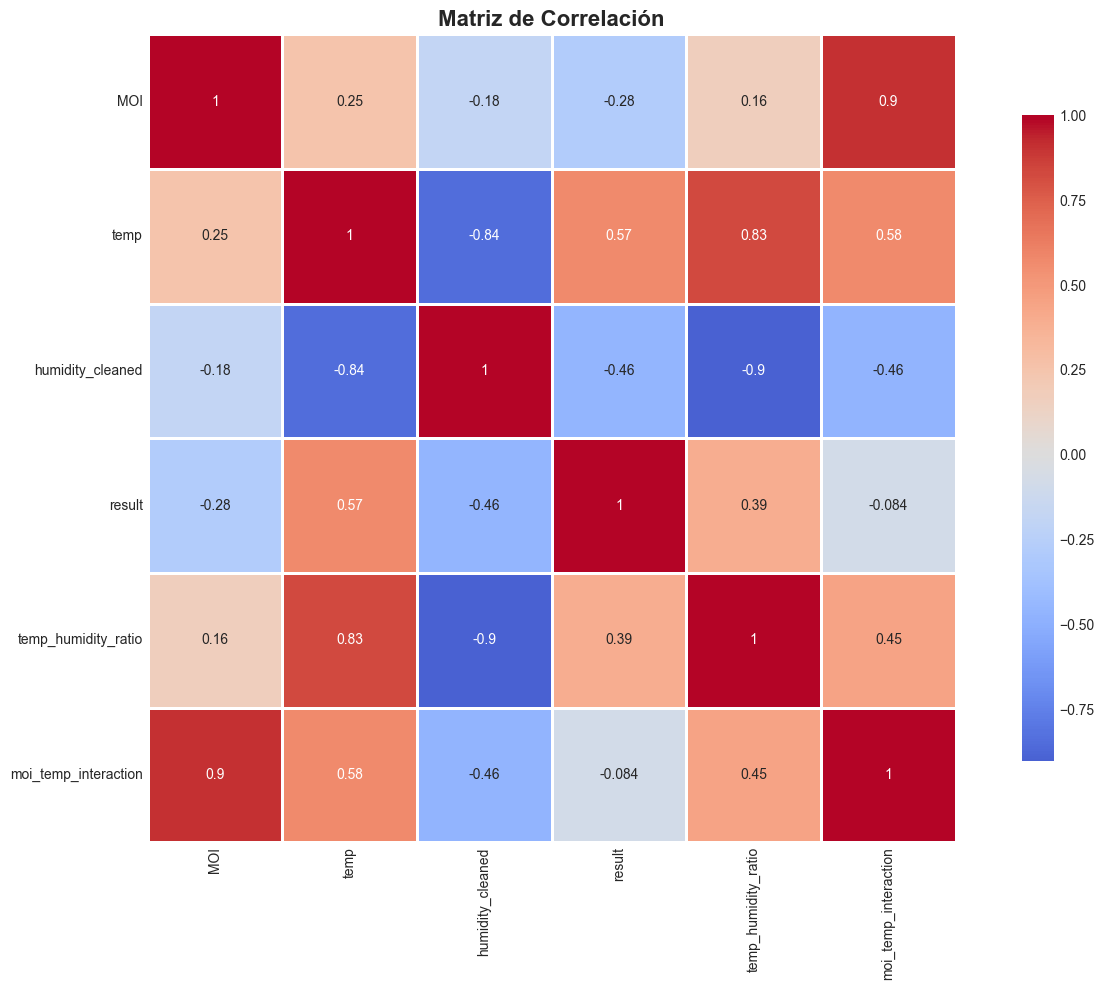

In [15]:
print("\n" + "="*80)
print("EXPLORACIÓN VISUAL DE DATOS (EDA)")
print("="*80)

# 1. Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = df[['MOI', 'temp', 'humidity_cleaned', 'result', 
                         'temp_humidity_ratio', 'moi_temp_interaction']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(visual_dir / "01_correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

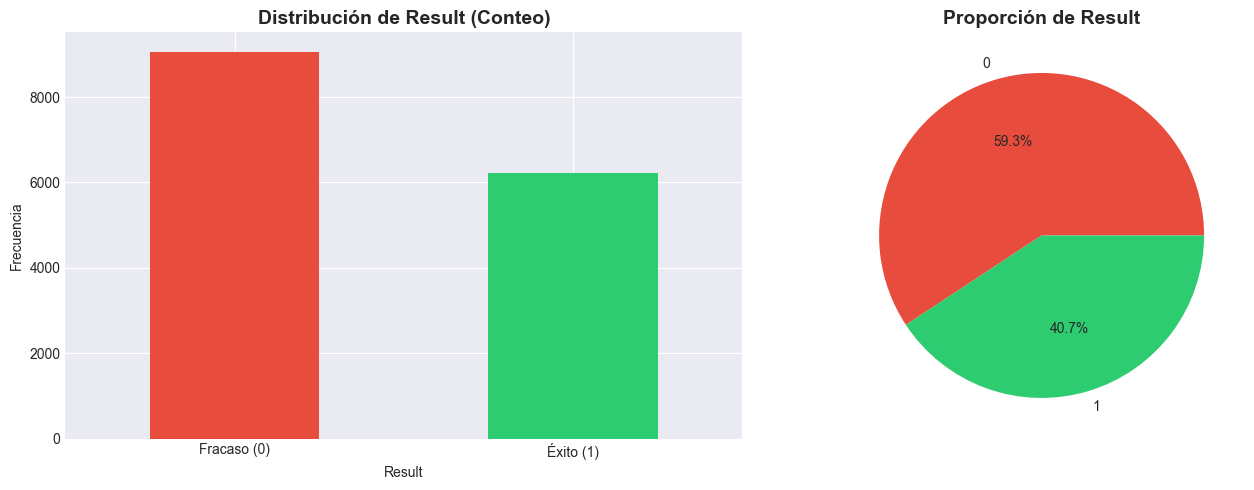


✅ Gráficos guardados en visualizaciones1/


In [16]:
# 2. Distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df['result'].value_counts().plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Distribución de Result (Conteo)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Result')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['Fracaso (0)', 'Éxito (1)'], rotation=0)

df['result'].value_counts(normalize=True).plot(kind='pie', ax=axes[1], 
                                                autopct='%1.1f%%', 
                                                colors=['#e74c3c', '#2ecc71'])
axes[1].set_title('Proporción de Result', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')
plt.tight_layout()
plt.savefig(visual_dir / "02_target_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("\n✅ Gráficos guardados en visualizaciones1/")

## 7. FASE 4: MODELADO (Modeling)

In [17]:
print("\n" + "="*80)
print("FASE 4: MODELADO (Modeling)")
print("="*80)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"\n✅ Dataset dividido:")
print(f"   - Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"   - Conjunto de prueba: {X_test.shape[0]} muestras")

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Características escaladas con StandardScaler")


FASE 4: MODELADO (Modeling)

✅ Dataset dividido:
   - Conjunto de entrenamiento: 12230 muestras
   - Conjunto de prueba: 3058 muestras

✅ Características escaladas con StandardScaler


In [18]:
# Verificar si se necesita SMOTE
class_distribution = y_train.value_counts()
minority_class = class_distribution.min()
majority_class = class_distribution.max()
imbalance_ratio = majority_class / minority_class

use_smote = imbalance_ratio > 1.5

print(f"\n📊 Análisis de balanceo de clases:")
print(f"   - Clase mayoritaria: {majority_class} muestras")
print(f"   - Clase minoritaria: {minority_class} muestras")
print(f"   - Ratio de desbalance: {imbalance_ratio:.2f}")
print(f"   - Usar SMOTE: {use_smote}")

if use_smote:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    print(f"\n✅ SMOTE aplicado. Nueva distribución de clases:")
    print(f"   - Clase 0: {(y_train_resampled == 0).sum()}")
    print(f"   - Clase 1: {(y_train_resampled == 1).sum()}")
else:
    X_train_resampled = X_train_scaled
    y_train_resampled = y_train
    print(f"\n⚠️ No se aplicó SMOTE (desbalance es bajo)")


📊 Análisis de balanceo de clases:
   - Clase mayoritaria: 7249 muestras
   - Clase minoritaria: 4981 muestras
   - Ratio de desbalance: 1.46
   - Usar SMOTE: False

⚠️ No se aplicó SMOTE (desbalance es bajo)


In [19]:
# Entrenamiento de modelos
print("\n" + "="*80)
print("ENTRENAMIENTO DE MODELOS")
print("="*80)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
}

# Evaluar y almacenar resultados
results = []
trained_models = {}

# Entrenamiento y evaluación de los modelos
for name, model in models.items():
    print(f"\n🔄 Entrenando {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        avg_precision = average_precision_score(y_test, y_pred_proba)
    else:
        roc_auc = np.nan
        avg_precision = np.nan
    
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, 
                                cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Avg_Precision': avg_precision,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std
    })
    
    trained_models[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"   ✅ Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

print("\n✅ Todos los modelos entrenados exitosamente")


ENTRENAMIENTO DE MODELOS

🔄 Entrenando Logistic Regression...
   ✅ Accuracy: 0.9467 | F1-Score: 0.9341 | ROC-AUC: 0.9891

🔄 Entrenando Gradient Boosting...
   ✅ Accuracy: 0.9876 | F1-Score: 0.9849 | ROC-AUC: 0.9992

🔄 Entrenando SVM...
   ✅ Accuracy: 0.9876 | F1-Score: 0.9849 | ROC-AUC: 0.9992

🔄 Entrenando SVM...
   ✅ Accuracy: 0.9614 | F1-Score: 0.9525 | ROC-AUC: 0.9916

🔄 Entrenando K-Nearest Neighbors...
   ✅ Accuracy: 0.9614 | F1-Score: 0.9525 | ROC-AUC: 0.9916

🔄 Entrenando K-Nearest Neighbors...
   ✅ Accuracy: 0.9725 | F1-Score: 0.9658 | ROC-AUC: 0.9944

🔄 Entrenando Naive Bayes...
   ✅ Accuracy: 0.8571 | F1-Score: 0.8052 | ROC-AUC: 0.9584

🔄 Entrenando AdaBoost...
   ✅ Accuracy: 0.9725 | F1-Score: 0.9658 | ROC-AUC: 0.9944

🔄 Entrenando Naive Bayes...
   ✅ Accuracy: 0.8571 | F1-Score: 0.8052 | ROC-AUC: 0.9584

🔄 Entrenando AdaBoost...
   ✅ Accuracy: 0.9680 | F1-Score: 0.9611 | ROC-AUC: 0.9968

✅ Todos los modelos entrenados exitosamente
   ✅ Accuracy: 0.9680 | F1-Score: 0.9611 

## 8. FASE 5: EVALUACIÓN Y COMPARACIÓN DE MODELOS

In [20]:
print("\n" + "="*80)
print("COMPARACIÓN DE MODELOS")
print("="*80)

# Crear dataframe de resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n📊 Resumen de rendimiento de modelos (ordenado por F1-Score):")
display(results_df)

# Guardar resultados
results_df.to_csv(models_dir / 'model_comparison_results.csv', index=False)
print(f"\n✅ Resultados guardados en: {models_dir / 'model_comparison_results.csv'}")


COMPARACIÓN DE MODELOS

📊 Resumen de rendimiento de modelos (ordenado por F1-Score):


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Avg_Precision,CV_Mean,CV_Std
1,Gradient Boosting,0.987574,0.976322,0.993574,0.984873,0.999175,0.998770,0.987980,0.001627
3,K-Nearest Neighbors,0.972531,0.979356,0.952610,0.965798,0.994432,0.990316,0.962142,0.006182
5,AdaBoost,0.967953,0.949099,0.973494,0.961142,0.996750,0.994930,0.969828,0.004700
2,SVM,0.961413,0.955538,0.949398,0.952458,0.991648,0.985647,0.958872,0.004430
0,Logistic Regression,0.946697,0.939837,0.928514,0.934141,0.989057,0.983054,0.944072,0.005955
4,Naive Bayes,0.857096,0.904810,0.725301,0.805172,0.958362,0.919727,0.855765,0.002918



✅ Resultados guardados en: C:\2025\CURSOS UNMSM\CICLO 8\SI\SI - PROYECTO FINAL\SistemaInteligentedePredicci-ndeRiego\modelos_guardados1\model_comparison_results.csv


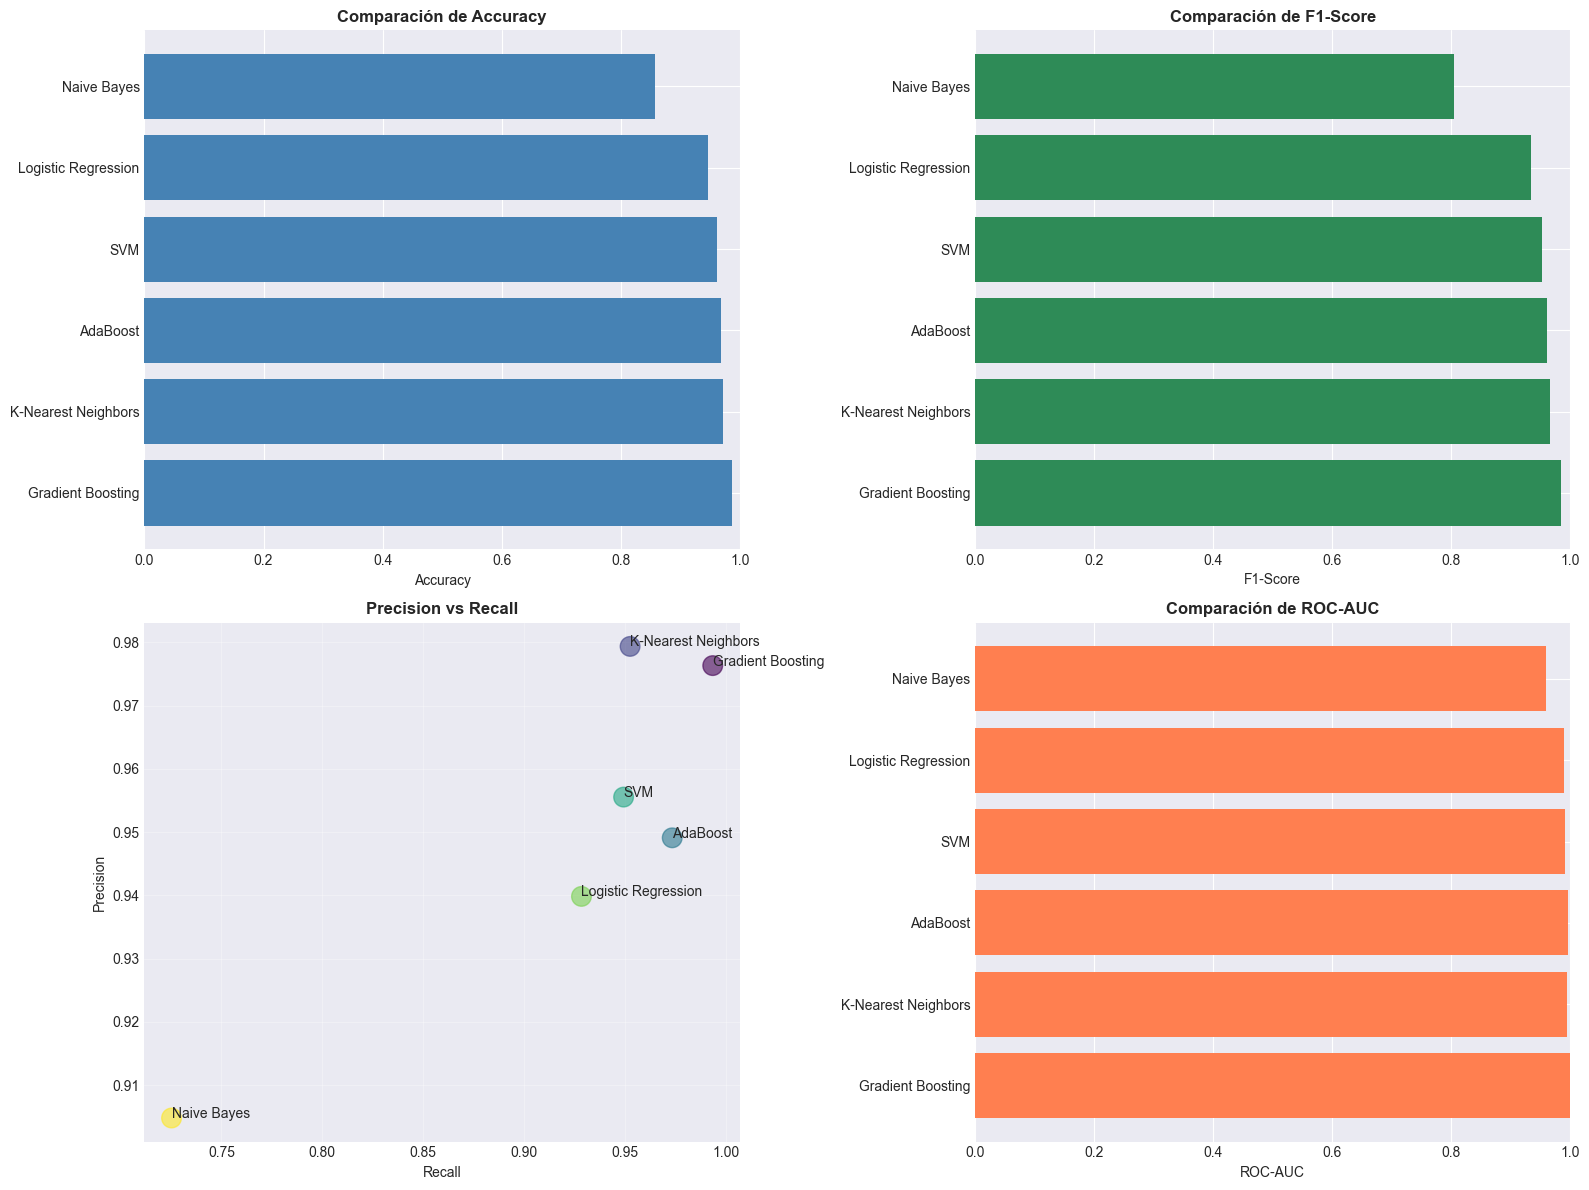


✅ Gráfico de comparación guardado


In [21]:
# Visualizar comparación de modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy
axes[0, 0].barh(results_df['Model'], results_df['Accuracy'], color='steelblue')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Comparación de Accuracy', fontweight='bold')
axes[0, 0].set_xlim([0, 1])

# F1-Score
axes[0, 1].barh(results_df['Model'], results_df['F1-Score'], color='seagreen')
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('Comparación de F1-Score', fontweight='bold')
axes[0, 1].set_xlim([0, 1])

# Precision vs Recall
axes[1, 0].scatter(results_df['Recall'], results_df['Precision'], s=200, alpha=0.6, c=range(len(results_df)), cmap='viridis')
for i, model in enumerate(results_df['Model']):
    axes[1, 0].annotate(model, (results_df['Recall'].iloc[i], results_df['Precision'].iloc[i]))
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision vs Recall', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# ROC-AUC
axes[1, 1].barh(results_df['Model'], results_df['ROC-AUC'], color='coral')
axes[1, 1].set_xlabel('ROC-AUC')
axes[1, 1].set_title('Comparación de ROC-AUC', fontweight='bold')
axes[1, 1].set_xlim([0, 1])

plt.tight_layout()
plt.savefig(visual_dir / "03_models_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("\n✅ Gráfico de comparación guardado")

## 9. ANÁLISIS DETALLADO DEL MEJOR MODELO

In [22]:
print("\n" + "="*80)
print("ANÁLISIS DETALLADO DEL MEJOR MODELO")
print("="*80)

# Mejor modelo
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]['model']
best_predictions = trained_models[best_model_name]['predictions']
best_probabilities = trained_models[best_model_name]['probabilities']

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"\nMétricas del mejor modelo:")
print(f"   - Accuracy:    {results_df.iloc[0]['Accuracy']:.4f}")
print(f"   - Precision:   {results_df.iloc[0]['Precision']:.4f}")
print(f"   - Recall:      {results_df.iloc[0]['Recall']:.4f}")
print(f"   - F1-Score:    {results_df.iloc[0]['F1-Score']:.4f}")
print(f"   - ROC-AUC:     {results_df.iloc[0]['ROC-AUC']:.4f}")

# Reporte de clasificación
print(f"\n📊 Reporte de Clasificación:")
print(classification_report(y_test, best_predictions, target_names=['Fracaso', 'Éxito']))


ANÁLISIS DETALLADO DEL MEJOR MODELO

🏆 MEJOR MODELO: Gradient Boosting

Métricas del mejor modelo:
   - Accuracy:    0.9876
   - Precision:   0.9763
   - Recall:      0.9936
   - F1-Score:    0.9849
   - ROC-AUC:     0.9992

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

     Fracaso       1.00      0.98      0.99      1813
       Éxito       0.98      0.99      0.98      1245

    accuracy                           0.99      3058
   macro avg       0.99      0.99      0.99      3058
weighted avg       0.99      0.99      0.99      3058



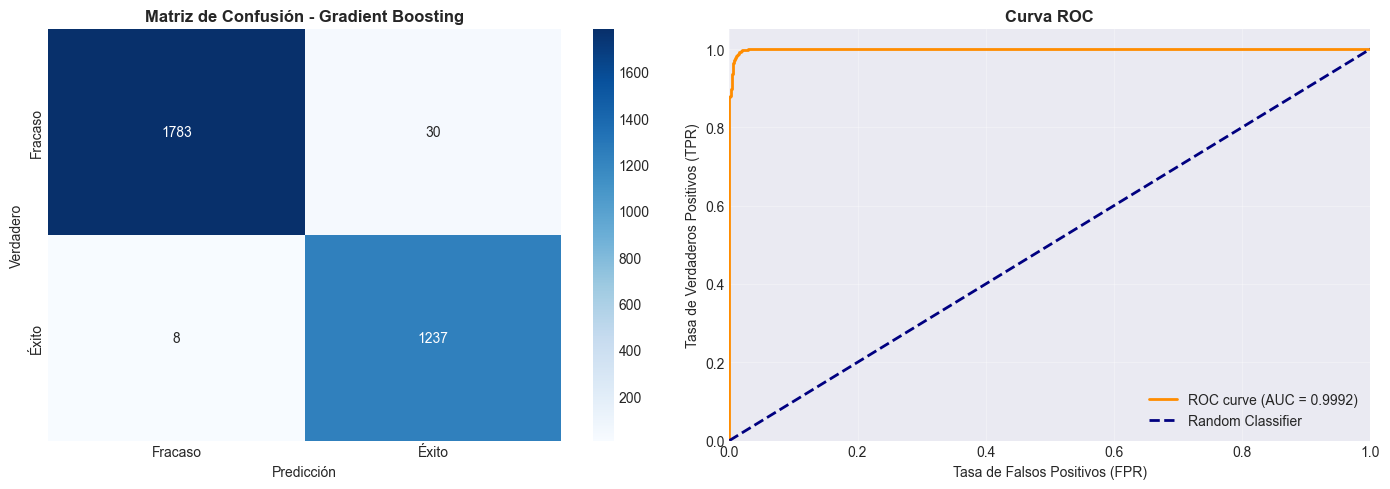


✅ Análisis del mejor modelo guardado


In [23]:
# Matriz de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Fracaso', 'Éxito'], yticklabels=['Fracaso', 'Éxito'])
axes[0].set_title(f'Matriz de Confusión - {best_model_name}', fontweight='bold')
axes[0].set_ylabel('Verdadero')
axes[0].set_xlabel('Predicción')

# Curva ROC
if best_probabilities is not None:
    fpr, tpr, thresholds = roc_curve(y_test, best_probabilities)
    roc_auc = roc_auc_score(y_test, best_probabilities)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('Tasa de Falsos Positivos (FPR)')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
    axes[1].set_title('Curva ROC', fontweight='bold')
    axes[1].legend(loc="lower right")
    axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(visual_dir / "04_best_model_analysis.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("\n✅ Análisis del mejor modelo guardado")